# 1. Library

In [22]:
import os
import torch

import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

import sklearn.preprocessing
#from directory_tree import display_tree
# Customed Library
import engine ,model_builder,utils
import data_loader
import numpy as np
#import torchinfo
from timeit import default_timer as timer 
from ros_data_reader import Vector_set
#display_tree('./')
import matplotlib.pyplot as plt

# 2. Data loading

In [16]:
A.Param

[['first', '0']]

In [6]:
#path='./rosbag_dir'
#Desired_param=[[0],[0],[0],[0],[0,1,2]]
#New_Columns=['Par1','Par2','Par3','Par4','Par5']

path='./first_trial'
Desired_param=[[0],[0]]
New_Columns=['Par1','Par2']

A=data_loader.data_loader(path,Desired_param)
A.file_searching(path)
list_file=A.desired_file_path(Desired_param)
Columns=['Force_X','Force_Y','Force_Z','Torque_X','Torque_Y','Torque_Z',
         'Input_P_1','Input_P_2','Flag',
         'Sensor_P_1_1','Sensor_P_1_2','Sensor_P_2_1','Sensor_P_2_2',
         'Sensor_P_3_1','Sensor_P_3_2','Sensor_P_4_1','Sensor_P_4_2',
         'Sensor_P_5_1','Sensor_P_5_2','Sensor_P_6_1','Sensor_P_6_2',
         'Sensor_S']
Total_dataset=A.read_Data_pandas(Columns,New_Columns)
Total_dataset

1st Folder name :  first_0
Contents in the folder : ['metadata.yaml', 'first_0.db3'] 


1 Parameters ['first'] 

2 Parameters ['0'] 



,Force_X,Force_Y,Force_Z,Torque_X,Torque_Y,Torque_Z,Input_P_1,Input_P_2,Flag,Sensor_P_1_1,...,Sensor_P_3_2,Sensor_P_4_1,Sensor_P_4_2,Sensor_P_5_1,Sensor_P_5_2,Sensor_P_6_1,Sensor_P_6_2,Sensor_S,Par1,Par2
0,0.000794,-0.205805,0.490874,-0.005637,0.000218,-0.000148,0.0,0.0,False,776.299988,...,773.700012,747.299988,777.799988,1036.500000,1045.699951,527.400024,798.799988,6694.399902,first,0
1,0.000794,-0.205805,0.490874,-0.005637,0.000218,-0.000148,0.0,0.0,False,776.299988,...,773.700012,747.299988,777.799988,1036.500000,1045.699951,527.400024,798.799988,6691.500000,first,0
2,0.000794,-0.205805,0.490874,-0.005637,0.000218,-0.000148,0.0,0.0,False,776.299988,...,773.700012,747.299988,777.799988,1036.500000,1045.699951,527.400024,798.799988,6691.500000,first,0
3,0.000794,-0.205805,0.490874,-0.005637,0.000218,-0.000148,0.0,0.0,False,776.299988,...,773.700012,747.299988,777.799988,1036.500000,1045.699951,527.400024,798.799988,6691.500000,first,0
4,0.000794,-0.205805,0.490874,-0.005637,0.000218,-0.000148,0.0,0.0,False,776.200012,...,773.700012,747.299988,777.799988,1036.500000,1045.699951,527.400024,798.799988,6691.500000,first,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20595,0.001068,-0.207219,0.503291,-0.005527,0.000286,-0.000279,0.0,0.0,False,673.200012,...,774.200012,744.799988,774.299988,1034.199951,1041.600098,523.000000,797.799988,6678.199707,first,0
20596,0.001068,-0.207219,0.503291,-0.005527,0.000286,-0.000279,0.0,0.0,False,673.200012,...,774.200012,744.799988,774.299988,1034.199951,1041.600098,523.000000,797.799988,6678.199707,first,0
20597,0.001068,-0.207219,0.503291,-0.005527,0.000286,-0.000279,0.0,0.0,False,673.200012,...,774.200012,744.799988,774.299988,1034.199951,1041.600098,523.099976,798.500000,6678.199707,first,0
20598,0.001068,-0.207219,0.503291,-0.005527,0.000286,-0.000279,0.0,0.0,False,673.200012,...,774.200012,744.799988,774.299988,1034.199951,1041.600098,523.099976,798.500000,6678.199707,first,0


### 3-1. FIltering

In [10]:
## Data filtering
# https://builtin.com/data-science/pandas-filter
Filtered_dataset=Total_dataset.query('Flag==True')
Filtered_dataset


,Force_X,Force_Y,Force_Z,Torque_X,Torque_Y,Torque_Z,Input_P_1,Input_P_2,Flag,Sensor_P_1_1,...,Sensor_P_3_2,Sensor_P_4_1,Sensor_P_4_2,Sensor_P_5_1,Sensor_P_5_2,Sensor_P_6_1,Sensor_P_6_2,Sensor_S,Par1,Par2
1167,-0.063664,3.048691,1.187733,-0.172625,-0.004700,0.016825,0.9,0.0,True,727.200012,...,773.599976,751.299988,780.799988,1057.400024,1482.000000,623.099976,832.100037,7250.000000,first,0
1168,-0.063664,3.048691,1.187733,-0.172625,-0.004700,0.016825,0.9,0.0,True,727.200012,...,773.599976,751.299988,780.600037,1057.199951,1482.199951,662.099976,832.100037,7250.000000,first,0
1169,-0.063664,3.048691,1.187733,-0.172625,-0.004700,0.016825,0.9,0.0,True,727.200012,...,773.599976,751.299988,780.600037,1057.199951,1482.199951,662.099976,832.100037,7250.000000,first,0
1170,-0.063664,3.048691,1.187733,-0.172625,-0.004700,0.016825,0.9,0.0,True,727.200012,...,773.599976,751.299988,780.600037,1057.199951,1482.199951,662.099976,832.400024,7250.000000,first,0
1171,-0.063664,3.048691,1.187733,-0.172625,-0.004700,0.016825,0.9,0.0,True,727.200012,...,773.599976,751.299988,780.600037,1057.199951,1482.199951,662.099976,832.400024,7250.000000,first,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,0.077320,1.105598,-0.584631,-0.121753,0.010542,0.003864,1.5,0.0,True,649.400024,...,783.099976,738.700012,753.900024,1032.199951,1043.400024,514.400024,806.599976,7992.299805,first,0
19233,0.077320,1.105598,-0.584631,-0.121753,0.010542,0.003864,1.5,0.0,True,649.400024,...,783.099976,738.700012,753.900024,1032.199951,1043.400024,514.400024,806.599976,7991.799805,first,0
19234,0.077320,1.105598,-0.584631,-0.121753,0.010542,0.003864,1.5,0.0,True,649.400024,...,783.099976,738.700012,753.900024,1032.199951,1043.400024,514.400024,806.599976,7991.799805,first,0
19235,0.077320,1.105598,-0.584631,-0.121753,0.010542,0.003864,0.0,0.0,True,656.099976,...,783.099976,738.700012,753.900024,1032.199951,1043.400024,514.400024,806.599976,7991.799805,first,0


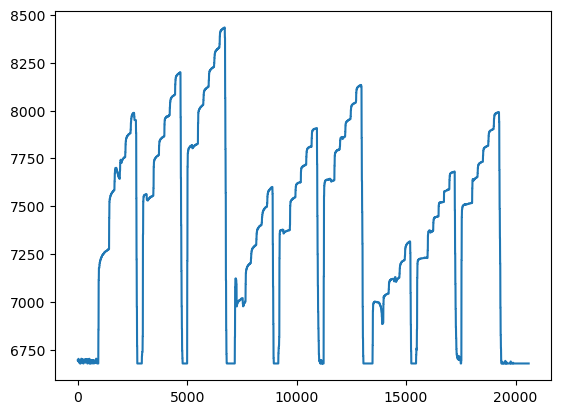

In [34]:
Total_dataset[S_Sensor_col].plot()

AttributeError: 'SubplotSpec' object has no attribute 'rowspan'

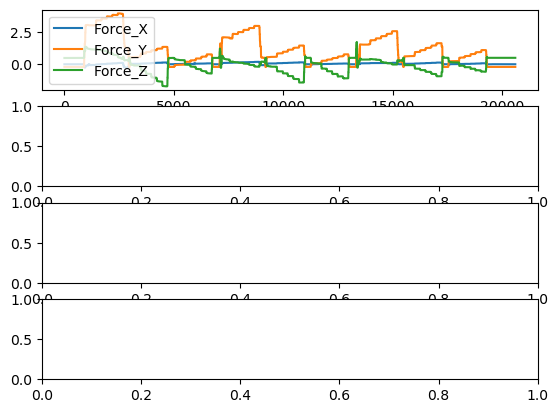

In [42]:
Fol_col=Total_dataset.columns[:3]
Input_P_col=Total_dataset.columns[6:8]
Flag_col=Total_dataset.columns[8]
P_Sensor_col=Total_dataset.columns[9:21]
S_Sensor_col=Total_dataset.columns[21]


fig, axes = plt.subplots(nrows=4, ncols=1)

Total_dataset[Fol_col].plot(ax=axes[0])
Total_dataset[Input_P_col].plot(ax=axes[1])
Total_dataset[S_Sensor_col].plot(ax=axes[2])
Total_dataset[P_Sensor_col].plot(ax=axes[3])



In [44]:
Total_dataset.to_pickle("./pickle/trial.pkl") 

### 3-2 Combination of the data

In [5]:
Total_col=[*Columns,*New_Columns]
for i in range(len(Total_col)):
    if i==0:
        print(f'{"Total column" :^120}')
        print('')
    print(f'{i:<} {Total_col[i] : <30}   ',end='')
    if i%3 ==0 and i!=0:
        print('')
        

Desired_combination_COL=[*Total_col[0:3],*Total_col[-9:-5]] ####################### chose the combination of the col
print('')
for i in range(len(Desired_combination_COL)):
    if i==0:
        print(f'{"Desired_combination_COL" :^120}')
        print('')
    print(f'{i:<} {Desired_combination_COL[i] : <30}   ',end='')
    if i%3 ==0 and i!=0:
        print('')


Desired_combination_COL
Combi_df=Filtered_dataset.filter(items=Desired_combination_COL)

                                                      Total column                                                      

0 Force_X                          1 Force_Y                          2 Force_Z                          3 Torque_X                         
4 Torque_Y                         5 Torque_Z                         6 Sensor_P_1_1                     
7 Sensor_P_1_2                     8 Sensor_P_2_1                     9 Sensor_P_2_2                     
10 Sensor_P_3_1                     11 Sensor_P_3_2                     12 Sensor_P_4_1                     
13 Sensor_P_4_2                     14 Sensor_P_5_1                     15 Sensor_P_5_2                     
16 Sensor_P_6_1                     17 Sensor_P_6_2                     18 Sensor_P_7_1                     
19 Sensor_P_7_2                     20 Sensor_S                         21 Par1                             
22 Par2                             23 Par3                             24 Par4          

### 3. Save the file into pickle format

In [6]:
save_mode= True

if save_mode== True:
    Combi_df.to_pickle("./pickle/test_1.pkl") 

# 3.Start

### 3-1. Data loading and preparation
1) Read pickle
2) Divide Input and output && Train and test set
3) To Tensor
4) Normalization
5) Batch size

In [7]:
Y=np.array(Combi_df.filter(items=Desired_combination_COL[0:1]))
Y

array([[8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [8.27074051e-04],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [2.47359276e-03],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],
       [1.89065933e-04],


In [14]:
Combi_df = pd.read_pickle("./pickle/test_1.pkl")  


# Setup hyperparameters
NUM_EPOCHS = 5
BATCH_SIZE = 32
HIDDEN_UNITS = 10
LEARNING_RATE = 0.001
#device = "cuda" if torch.cuda.is_available() else "cpu"
device = "cpu"
#!nvidia-smi

# Hot encoding needed
# Scailing!
# Validation dataset?

Y=np.array(Combi_df.filter(items=Desired_combination_COL[0:3]))
X=np.array(Combi_df.filter(items=Desired_combination_COL[3:]))

# Scaler
X_scaler = sklearn.preprocessing.MinMaxScaler()
Y_scaler = sklearn.preprocessing.MinMaxScaler()

X=torch.FloatTensor(X_scaler.fit_transform(X))
Y=torch.FloatTensor(Y_scaler.fit_transform(Y))



X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible


train_dataset=DataLoader(data_loader.Data(X_train,Y_train),batch_size=BATCH_SIZE)
test_dataset=DataLoader(data_loader.Data(X_test,Y_test),batch_size=BATCH_SIZE)
Input_dim=len(X_train[0])
Output_dim=len(Y_train[0])

print(f'{"Input dim ":>20}{Input_dim}{"||":^25}{"Output dim ":>20}{Output_dim}')
print(f'Input Train: {len(X_train)},Test: {len(X_test)}   ||   Output Train: {len(Y_train)}, Test: {len(Y_test)}')

          Input dim 4           ||                     Output dim 3
Input Train: 728,Test: 183   ||   Output Train: 728, Test: 183


### 3-2. Set hypermeter
1. Epochs
2. Batch size
3. Learning rate
4. Device 
5. Activation function
6. Loss function
7. Optimizer

In [18]:
Input_dim

4

In [15]:

# Model

model = model_builder.LSTMModel1(
    input_dim = Input_dim,
    hidden_dim=HIDDEN_UNITS,
    layer_dim=2,
    output_dim=Output_dim,
    dropout_prob=0.7)


# Set loss and optimizer
loss_fn = torch.nn.MSELoss() ## change
optimizer = torch.optim.Adam(model.parameters(), ## change
                             lr=LEARNING_RATE)


### 3-3. Model


In [16]:

#torchinfo.summary(model,(5,5,5))
start_time = timer()
results=engine.train(model=model,
             train_dataloader=train_dataset,
             test_dataloader=test_dataset,
             loss_fn=loss_fn,
             optimizer=optimizer,
             epochs=NUM_EPOCHS,
             device=device)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")
utils.plot_loss_curves([results])

  0%|          | 0/5 [00:00<?, ?it/s]

/home/ipk410/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([32, 3])) that is different to the input size (torch.Size([32, 10])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


RuntimeError: The size of tensor a (10) must match the size of tensor b (3) at non-singleton dimension 1

### 3-4 Compare the results and save

In [10]:

results


{'train_loss': [0.0555590341353546,
  0.0453359468475632,
  0.04060288804137836,
  0.03824355520065064,
  0.03727536850973316],
 'train_acc': [0.3645833333333333,
  0.2821557971014493,
  0.19972826086956522,
  0.1480978260869565,
  0.14673913043478262],
 'test_loss': [0.033040914529313646,
  0.026564101067682106,
  0.023728286769861977,
  0.022340329946018755,
  0.021661792416125536],
 'test_acc': [0.5, 0.5, 0.4427083333333333, 0.23958333333333334, 0.28125]}